In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [2]:
sess = tf.InteractiveSession()

In [3]:
image = np.zeros((100, 100))
image[25:30,80:80+5]=1
image[25:30,80+10:80+15]=1

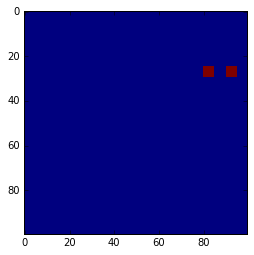

In [4]:
plt.imshow(image, interpolation='nearest')
plt.show()

In [5]:
image = tf.constant(image)
egomotion = tf.constant(np.array([[30., -25., -np.pi/2]]), dtype=tf.float32)

In [6]:
tx, ty, r = tf.unstack(egomotion, axis=1)

In [7]:
rot_op = tf.contrib.image.angles_to_projective_transforms(r, 100, 100)

In [8]:
trans_op = tf.stack([tf.ones_like(tx), tf.zeros_like(tx), tx] + 
                    [tf.zeros_like(ty), tf.ones_like(ty), ty] +
                    [tf.zeros_like(tx)] * 2, axis=1)

In [9]:
transform_op = tf.contrib.image.transform(image, trans_op)

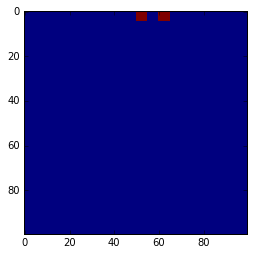

In [10]:
plt.imshow(transform_op.eval(), interpolation='nearest')
plt.show()

In [11]:
transform_op = tf.contrib.image.transform(image, rot_op)

In [12]:
trans_op.eval()

array([[ 1.,  0., 30.,  0.,  1., 25.,  0.,  0.]], dtype=float32)

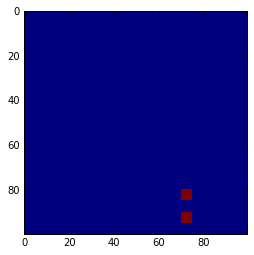

In [13]:
plt.imshow(transform_op.eval(), interpolation='nearest')
plt.show()

In [14]:
trans_mat = tf.contrib.image.compose_transforms(trans_op, rot_op)
transform_op = tf.contrib.image.transform(image, trans_mat)

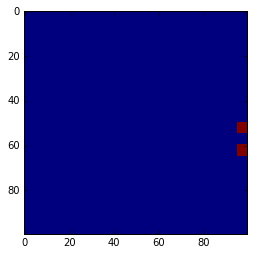

In [15]:
plt.imshow(transform_op.eval(), interpolation='nearest')
plt.show()